In [19]:
import etf_db as etf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [7]:
data = etf.download_clean_public_data()

Download  . 

KeyboardInterrupt: 

In [14]:
#with open('data.pickle', 'wb') as handle:
#    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

data.head()

,symbol,name,mobile_title,price,assets,average_volume,ytd,overall_rating,asset_class,fifty_two_week,...,tax_form,lower_bollinger,realtime_volatility,resistance_level_1,rsi_20_day,support_level_1,upper_bollinger,realtime_expenses,realtime_liquidity,realtime_overall
0,SPY,SPDR S&P 500 ETF,SPY - SPDR S&P 500 ETF,390.72,340295.0,63066805.0,4.50,NaN,Equity,17.64,...,1099,372.63,NaN,392.24,62.18,388.47,396.86,A,A+,NaN
1,IVV,iShares Core S&P 500 ETF,IVV - iShares Core S&P 500 ETF,392.25,254584.0,4040147.0,4.49,NaN,Equity,17.66,...,1099,374.25,NaN,393.76,62.29,389.98,398.17,A,A,NaN
2,VTI,Vanguard Total Stock Market ETF,VTI - Vanguard Total Stock Market ETF,205.50,219219.0,4078445.0,5.58,NaN,Equity,21.48,...,1099,194.74,NaN,206.39,62.86,204.31,209.79,A,A,NaN
3,VOO,Vanguard S&P 500 ETF,VOO - Vanguard S&P 500 ETF,359.25,199296.0,3021663.0,4.53,NaN,Equity,17.67,...,1099,342.72,NaN,360.62,62.27,357.18,364.86,A,A,NaN
4,QQQ,Invesco QQQ,QQQ - Invesco QQQ,332.47,159866.0,28404027.0,5.97,NaN,Equity,41.30,...,1099,317.93,NaN,334.77,60.60,329.26,339.15,B+,A,NaN


In [ ]:
pal = sns.color_palette("Blues", as_cmap=True)
sns.scatterplot(x = 'five_ytd', y = 'three_ytd', data = data, palette=pal, alpha =0.5)
plt.axis('equal')
plt.show()  
sns.scatterplot(x = 'three_ytd', y = 'fifty_two_week', data = data, palette=pal, alpha =0.5)
plt.axis('equal')
plt.show()   
sns.scatterplot(x = 'three_ytd', y = 'ytd', data = data, palette=pal, alpha =0.5)
plt.axis('equal')
plt.show()        

In [15]:
equity = data[data['asset_class'] == 'Equity']
equity = equity[equity['three_ytd'] > 0]
equity = equity[equity['five_ytd'] > 0]
equity = equity[equity['fifty_two_week'] > 0]

In [ ]:
volatility = equity['two_hundred_day_volatility'] / equity['price']
std = equity['standard_deviation'] / equity['price']

sns.relplot(x = 'five_ytd', y = 'price', hue = std, data = equity, size = volatility, legend = False)
sns.relplot(x = 'three_ytd', y = 'price', hue = std, data = equity, size = volatility, legend = False)
sns.relplot(x = 'fifty_two_week', y = 'price', hue = std, data = equity, size = volatility, legend = False)

In [16]:
my_subset = equity[equity['three_ytd'] > 100]
my_subset = my_subset[my_subset['price'] < 300]

display(my_subset.head())
display(my_subset.shape)
print('How much will cost to buy them all? ' + str(my_subset['price'].values.sum()) + '$')

,symbol,name,mobile_title,price,assets,average_volume,ytd,overall_rating,asset_class,fifty_two_week,...,tax_form,lower_bollinger,realtime_volatility,resistance_level_1,rsi_20_day,support_level_1,upper_bollinger,realtime_expenses,realtime_liquidity,realtime_overall
27,XLK,Technology Select Sector SPDR Fund,XLK - Technology Select Sector SPDR Fund,136.25,39639.90,6435779.0,4.79,NaN,Equity,34.21,...,1099,130.01,NaN,136.98,59.12,135.03,139.24,A,A+,NaN
40,ARKK,ARK Innovation ETF,ARKK - ARK Innovation ETF,149.19,27634.20,6423297.0,19.84,NaN,Equity,151.07,...,1099,136.78,NaN,150.91,58.59,146.78,158.88,C+,A,NaN
96,ARKG,ARK Genomic Revolution ETF,ARKG - ARK Genomic Revolution ETF,105.70,12549.40,5099239.0,13.34,NaN,Equity,183.07,...,1099,101.44,NaN,107.14,52.58,103.71,114.86,C,NaN,NaN
112,TQQQ,ProShares UltraPro QQQ,TQQQ - ProShares UltraPro QQQ,106.22,10943.00,32982813.0,16.85,NaN,Equity,79.94,...,1099,93.55,NaN,108.03,59.79,103.35,112.27,A-,A+,NaN
126,ARKW,ARK Next Generation Internet ETF,ARKW - ARK Next Generation Internet ETF,181.36,9391.44,1481615.0,23.91,NaN,Equity,155.26,...,1099,153.44,NaN,183.05,67.15,178.84,192.01,C,A,NaN


(38, 59)

How much will cost to buy them all? 4630.18$


In [ ]:
display(my_subset.describe())
sns.distplot(my_subset['price'])

In [ ]:
sns.pairplot(data=my_subset)

In [11]:
sns_plot = sns.pairplot(data=my_subset)
sns_plot.savefig("pairplot.pdf")

Error in callback <function flush_figures at 0x12388e8c0> (for post_execute):


KeyboardInterrupt: 

In [21]:
corr_matrix = data.corr()

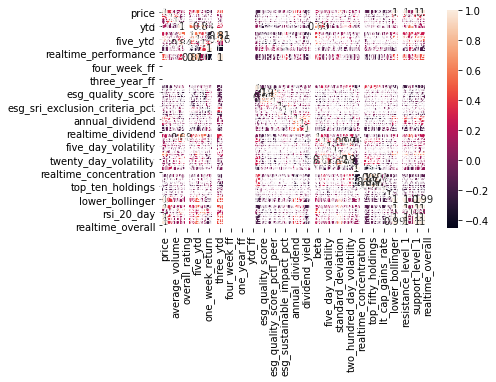

In [23]:
sns_plot = sns.heatmap(corr_matrix, annot=True)
sns_plot.savefig("corrMatrix.pdf")